# Imports

In [1]:
import pandas as pd
import os
import matplotlib

%matplotlib inline

print pd.__version__

0.20.3


# Axis parameter in Pandas (Vid-11)

In [2]:
# reading table
# making seperator as comma
df = pd.read_table(
                   'http://bit.ly/drinksbycountry', 
                   sep=','
                  )
df.head(5)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [3]:
# in-context with drop() method for column
# since inplace=T/F not used. So it is not saved for now.
df.drop('continent', axis=1).head(5)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


In [4]:
# in-context with drop() method for row
# since inplace=T/F not used. So it is not saved for now.
df.drop(3, axis=0).head(5)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
4,Angola,217,57,45,5.9,Africa
5,Antigua & Barbuda,102,128,45,4.9,North America


In [5]:
# mean() method bydefault takes axis=0, if not specified
df.mean(axis=0) == df.mean()

beer_servings                   True
spirit_servings                 True
wine_servings                   True
total_litres_of_pure_alcohol    True
dtype: bool

# Takeaways

1. axis=1 (Y-axis/Column) == axis='columns'
2. axis=0 (X-axis/Row) == axis='index'

# -----------------------

# String Method in Pandas (Vid-12)

In [6]:
# reading table
# making seperator as comma
df = pd.read_table(
                   'http://bit.ly/drinksbycountry', 
                   sep=','
                  )
df.head(5)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [7]:
# we would like to make continent to all small letters
df['continent'] =  df['continent'].str.lower()

In [8]:
# we would now like to filter the table where continent is asia
df[df.continent.str.contains('asia')].head(5)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,asia
12,Bahrain,42,63,7,2.0,asia
13,Bangladesh,0,0,0,0.0,asia
19,Bhutan,23,0,0,0.4,asia
24,Brunei,31,2,1,0.6,asia


# Takeaways

1. To apply any of the string methods on pandas series, first typecast them as string by using .str then use the relevant method

# -----------------------

# Data type change (Vid-13)

In [9]:
# reading table
# making seperator as comma
df = pd.read_table(
                   'http://bit.ly/drinksbycountry', 
                   sep=','
                  )
df.head(5)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [10]:
# country and continent are strings, rest all are numeric
df.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [11]:
df.total_litres_of_pure_alcohol = df.total_litres_of_pure_alcohol.astype('int64')

In [12]:
# notice the change under `total_litres_of_pure_alcohol` column name
df.head(5)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0,Asia
1,Albania,89,132,54,4,Europe
2,Algeria,25,0,14,0,Africa
3,Andorra,245,138,312,12,Europe
4,Angola,217,57,45,5,Africa


# Takeaways

1. Sometimes while importing dataset, you numbers can be of object type. There you might want to changes the types for applying mathematical operations.

# -----------------------

# Using GroupBy (Vid-14)

In [13]:
# reading table
# making seperator as comma
df = pd.read_table(
                   'http://bit.ly/drinksbycountry', 
                   sep=','
                  )
df.head(5)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [14]:
# we will group by each continent to get on average total_liters_of_pure_alcohol
df.groupby('continent')['total_litres_of_pure_alcohol'].mean()

continent
Africa           3.007547
Asia             2.170455
Europe           8.617778
North America    5.995652
Oceania          3.381250
South America    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

In [15]:
# for continent asia, what is the mean value of `total_litres_of_pure_alcohol`
df[df.continent.str.contains('Asia')]['total_litres_of_pure_alcohol'].mean()

2.170454545454545

In [16]:
# keeping eye to all necessary stats at once using `agg` method by passing list of necessary attributes
df.groupby('continent')['total_litres_of_pure_alcohol'].agg(['count', 'min', 'max', 'mean'])

,count,min,max,mean
continent,,,,
Africa,53,0.0,9.1,3.007547
Asia,44,0.0,11.5,2.170455
Europe,45,0.0,14.4,8.617778
North America,23,2.2,11.9,5.995652
Oceania,16,0.0,10.4,3.381250
South America,12,3.8,8.3,6.308333


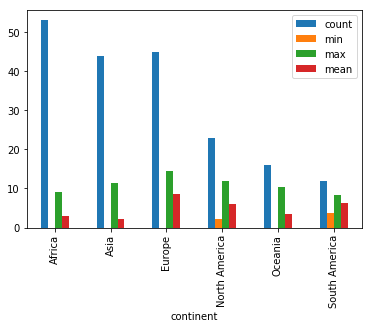

In [17]:
df.groupby('continent')['total_litres_of_pure_alcohol'].agg(['count', 'min', 'max', 'mean']).plot(kind='bar')

# Takeaways

1. "agg" method can be used to generate stats in one shot

# -----------------------